In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('laptop_price.csv',encoding='latin-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
#laptop_ID can be dropped
df.drop('laptop_ID',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [6]:
df.describe()
#Price_euros have some outliers.

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [7]:
df2=df

In [8]:
#dropping Product column
df2.drop('Product',axis=1,inplace=True)

In [9]:
df2.describe(include='object')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### plots (uni-variate)

<Axes: xlabel='count', ylabel='Company'>

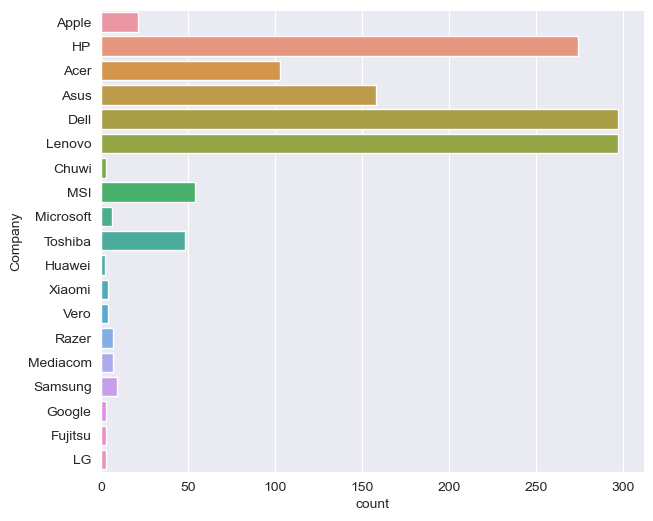

In [11]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(7,6))

sns.countplot(df2,y='Company')
#Dell and Lenovo appears to be having an equal count

<Axes: xlabel='Price_euros', ylabel='Count'>

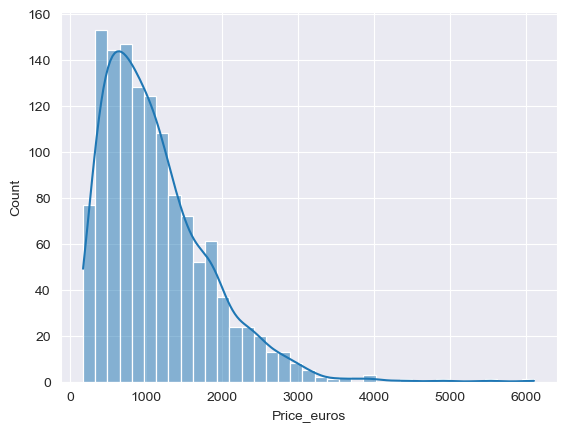

In [12]:
sns.histplot(df2,x='Price_euros',kde=True)
#majority of the laptop prices are between 400-2000 euros

<Axes: xlabel='Inches', ylabel='Count'>

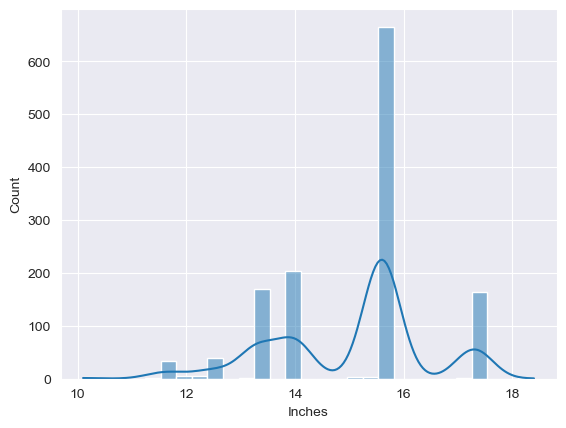

In [13]:
sns.histplot(df2,x='Inches',kde=True)

<Axes: ylabel='TypeName'>

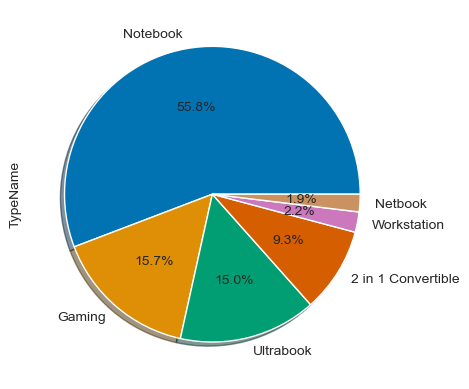

In [14]:
df2['TypeName'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('colorblind'),shadow=True)

### plots(bi-variate)

<Axes: xlabel='Price_euros', ylabel='Inches'>

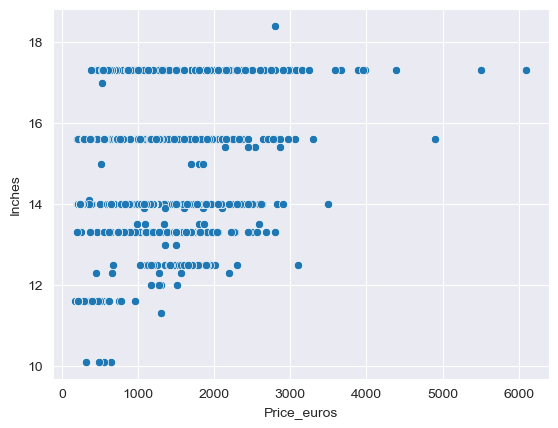

In [15]:
sns.scatterplot(df2,x='Price_euros',y='Inches')

<Axes: xlabel='Price_euros', ylabel='Company'>

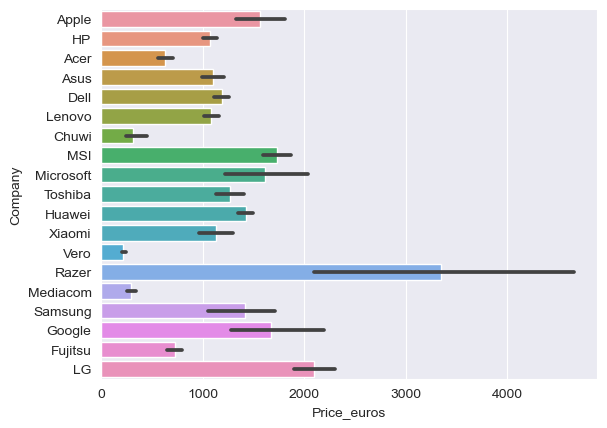

In [16]:
sns.barplot(df2,y='Company',x='Price_euros')
#razer laptops are highly priced

<Axes: xlabel='Price_euros', ylabel='OpSys'>

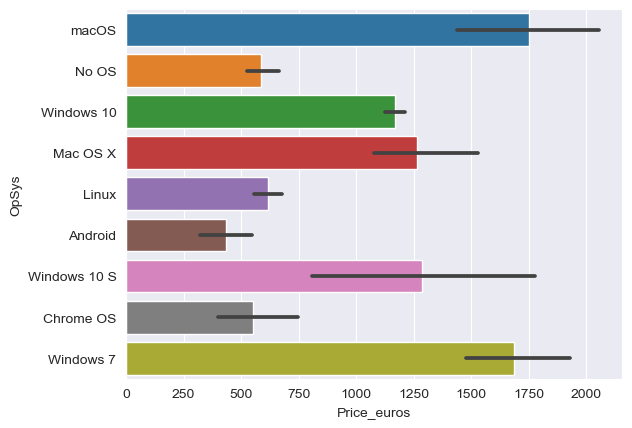

In [17]:
sns.barplot(df2,y='OpSys',x='Price_euros')

In [18]:
#here in the datset weight is categorical but we can change it to numeric continous
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [19]:
df2['Weight']=df2['Weight'].str.replace('kg','')

In [20]:
df2.head()
df2['Weight_kg']=df2['Weight'].astype(float)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
 11  Weight_kg         1303 non-null   float64
dtypes: float64(3), object(9)
memory usage: 122.3+ KB


In [22]:
#df2.drop('Weight',axis=1,inplace=True)
df2=df2.iloc[:,[0,1,2,3,4,5,6,7,8,10,9]]

<Axes: xlabel='Weight', ylabel='Price_euros'>

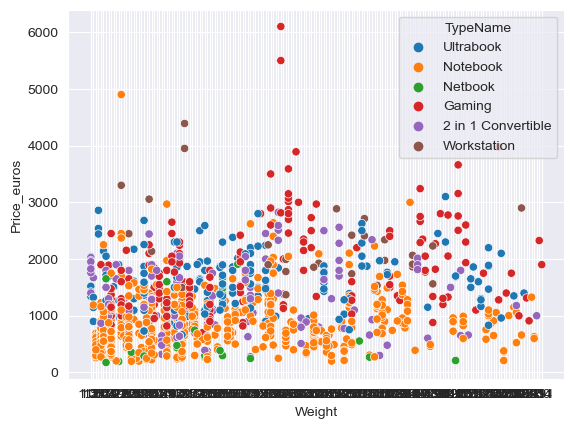

In [23]:
sns.scatterplot(df2,x='Weight',y='Price_euros',hue='TypeName')
#Gaming laptops tend to be heavier and costlier

In [24]:
df2['Price_euros'].groupby([df['Company'],df['TypeName']]).mean()

Company    TypeName          
Acer       2 in 1 Convertible     698.751250
           Gaming                1468.125000
           Netbook                306.000000
           Notebook               540.139744
           Ultrabook              890.500000
Apple      Ultrabook             1564.198571
Asus       2 in 1 Convertible     976.385385
           Gaming                1720.005370
           Netbook                266.200000
           Notebook               627.102388
           Ultrabook             1290.240000
Chuwi      Notebook               314.296667
Dell       2 in 1 Convertible    1131.670333
           Gaming                1918.393000
           Netbook                519.500000
           Notebook               870.963212
           Ultrabook             1477.915714
           Workstation           2219.169091
Fujitsu    Notebook               729.000000
Google     Ultrabook             1677.666667
HP         2 in 1 Convertible    1506.810000
           Gaming        

In [25]:
# df2['Weight_kg'].groupby(df['Company']).mean()
df2

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros,Weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,1.37
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,638.00,1.8
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1499.00,1.3
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,229.00,1.5
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,764.00,2.19


In [26]:
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros,Weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,1.37


In [27]:
df2.pivot_table(index=["Company"],columns=["OpSys"], values=["Price_euros"],aggfunc=["mean"])

mean                                                    \
          Price_euros                                                     
OpSys         Android    Chrome OS       Linux    Mac OS X        No OS   
Company                                                                   
Acer              NaN   310.454545  524.975000         NaN          NaN   
Apple             NaN          NaN         NaN  1262.87125          NaN   
Asus              NaN   705.300000  484.897000         NaN   908.750000   
Chuwi             NaN          NaN         NaN         NaN          NaN   
Dell              NaN   295.000000  694.713889         NaN          NaN   
Fujitsu           NaN          NaN         NaN         NaN          NaN   
Google            NaN  1677.666667         NaN         NaN          NaN   
HP                NaN   527.500000         NaN         NaN   371.222500   
Huawei            NaN          NaN         NaN         NaN          NaN   
LG                NaN          NaN         NaN         NaN          NaN   
Lenovo          434.0   349.966667         NaN         NaN   576.972766   
MSI               NaN          NaN         NaN         NaN          NaN   
Mediacom          NaN          NaN         NaN         NaN          NaN   
Microsoft         NaN          NaN         NaN         NaN          NaN   
Razer             NaN          NaN         NaN         NaN          NaN   
Samsung           NaN   464.000000         NaN         NaN          NaN   
Toshiba           NaN          NaN         NaN         NaN          NaN   
Vero              NaN          NaN         NaN         NaN          NaN   
Xiaomi            NaN          NaN         NaN         NaN  1199.616667   

                                                               
                                                               
OpSys       Windows 10 Windows 10 S    Windows 7        macOS  
Company                                                        
Acer        693.990921          NaN          NaN          NaN  
Apple              NaN          NaN          NaN  1749.630769  
Asus       1174.394964   308.995000          NaN          NaN  
Chuwi       314.296667          NaN          NaN          NaN  
Dell       1260.711858          NaN  1142.527143          NaN  
Fujitsu     729.000000          NaN          NaN          NaN  
Google             NaN          NaN          NaN          NaN  
HP         1034.665532          NaN  1863.445217          NaN  
Huawei     1424.000000          NaN          NaN          NaN  
LG         2099.000000          NaN          NaN          NaN  
Lenovo     1169.108534          NaN  1722.106154          NaN  
MSI        1728.908148          NaN          NaN          NaN  
Mediacom    295.000000          NaN          NaN          NaN  
Microsoft          NaN  1612.308333          NaN          NaN  
Razer      3346.142857          NaN          NaN          NaN  
Samsung    1684.714286          NaN          NaN          NaN  
Toshiba    1265.217391          NaN  1327.500000          NaN  
Vero        217.425000          NaN          NaN          NaN  
Xiaomi      935.000000          NaN          NaN          NaN

### Train Test Split

In [28]:
#as the values are in the similar range,lets ee withouth scaling the data.
X=df2.drop('Price_euros',axis=1)
y=df2['Price_euros']

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
dtypes: float64(1), object(9)
memory usage: 101.9+ KB


In [30]:
X_cat=X.select_dtypes('object')

In [31]:
X_cat_encoded=pd.get_dummies(X_cat)

In [33]:
X_cat_encoded

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,Weight_4.14,Weight_4.2,Weight_4.3,Weight_4.33,Weight_4.36,Weight_4.4,Weight_4.42,Weight_4.5,Weight_4.6,Weight_4.7
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X=pd.concat([X_cat_encoded,df2[['Inches','Weight_kg']]],axis=1)

KeyError: "['Weight_kg'] not in index"

In [ ]:
X.shape

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

### using Hold out method

In [ ]:
Mape_train=[]
Mape_test=[]
for k in list(range(1,30,2)):
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred)
    Mape_train.append(train_MAPE)
    y_test_pred=model.predict(X_test)
    test_MAPE=mean_absolute_percentage_error(y_test,y_test_pred)
    Mape_test.append(test_MAPE)

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',markers='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',markers='o')

### using CV score Method

In [ ]:
data_cv=pd.concat([X,y],axis=1)

In [ ]:
data_cv.shape

In [ ]:
k_values = np.arange(1, 30, 2)
cv_mape_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',markers='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',markers='o')
sns.lineplot(y=cv_mape_scores,x=list(range(1,30,2)),label='MAPE_CV',markers=True)

#at K=3 we can see the minimum difference between the Test MAPE,Train MAPE, CV MAPE